In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
try:
    df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='ISO-8859-1')

In [17]:
print(df.shape)

(11251, 15)


In [19]:
print(df.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [24]:
df.drop(columns = ['Status', 'unnamed1'], inplace=True)

In [29]:
print(df.isnull().sum())

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [30]:
print(df.describe())

            User_ID           Age  Marital_Status        Orders        Amount
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000


In [32]:
description = df.describe()
print(description[['Age', 'Orders', 'Amount']].loc['mean'])

Age         35.421207
Orders       2.489290
Amount    9453.610858
Name: mean, dtype: float64


<Axes: xlabel='Gender', ylabel='count'>

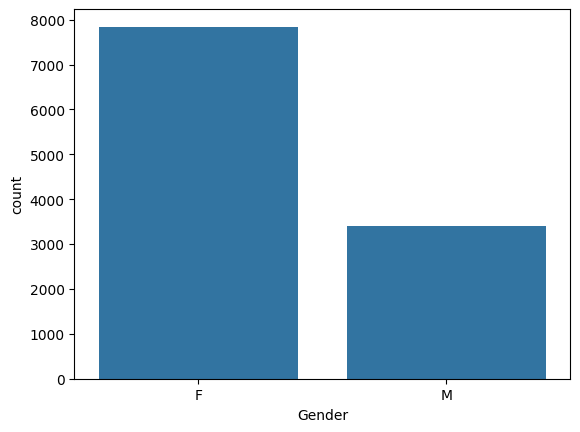

In [45]:
sns.countplot(x = 'Gender', data = df)

Text(0.5, 1.0, 'Total Amount Spent by Gender')

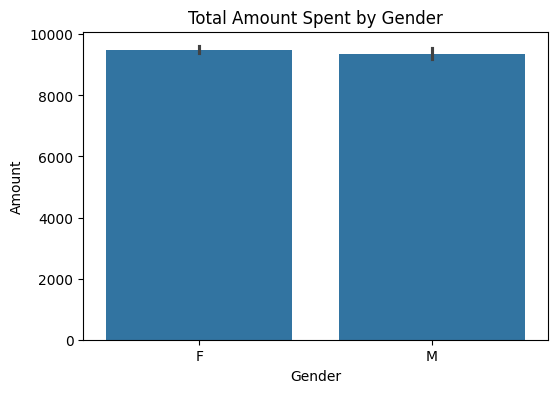

In [47]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Amount', data=df)
plt.title('Total Amount Spent by Gender')

Text(0, 0.5, 'Count')

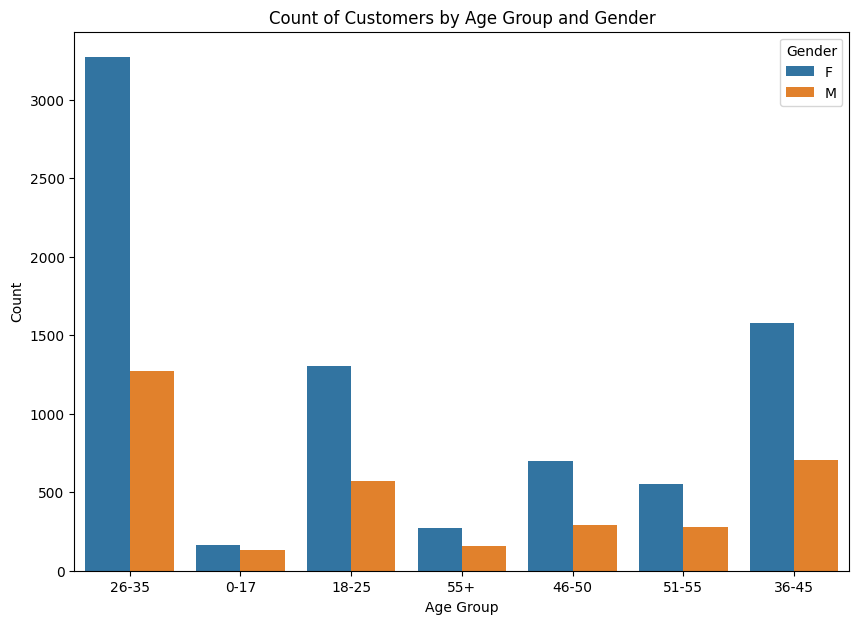

In [49]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Count of Customers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

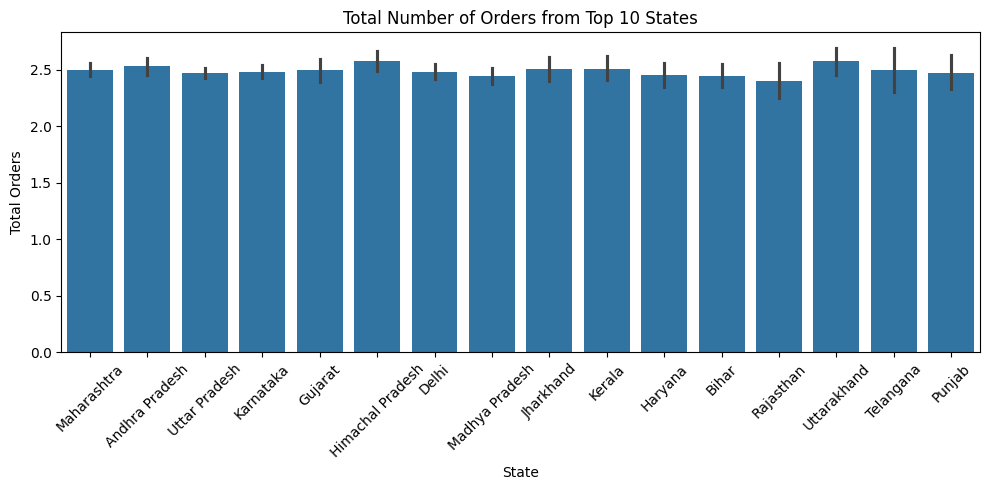

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='State', y='Orders', data= df)
plt.title('Total Number of Orders from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()

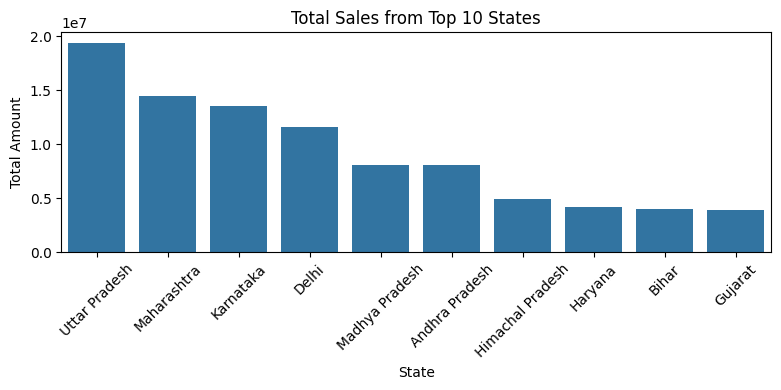

In [63]:
sales_state = df.groupby(['State'])['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_state.index, y=sales_state.values)
plt.title('Total Sales from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()


Text(0, 0.5, 'Count')

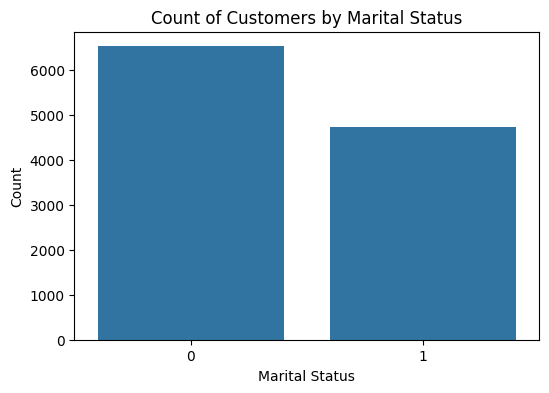

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status')
plt.title('Count of Customers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

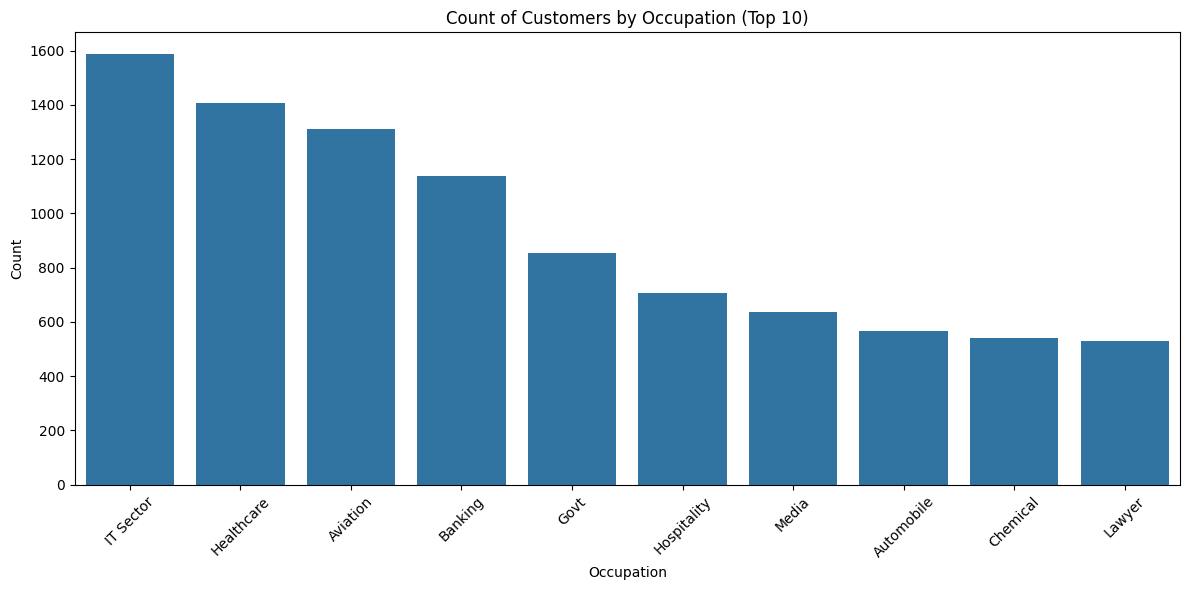

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().iloc[:10].index)
plt.title('Count of Customers by Occupation (Top 10)')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

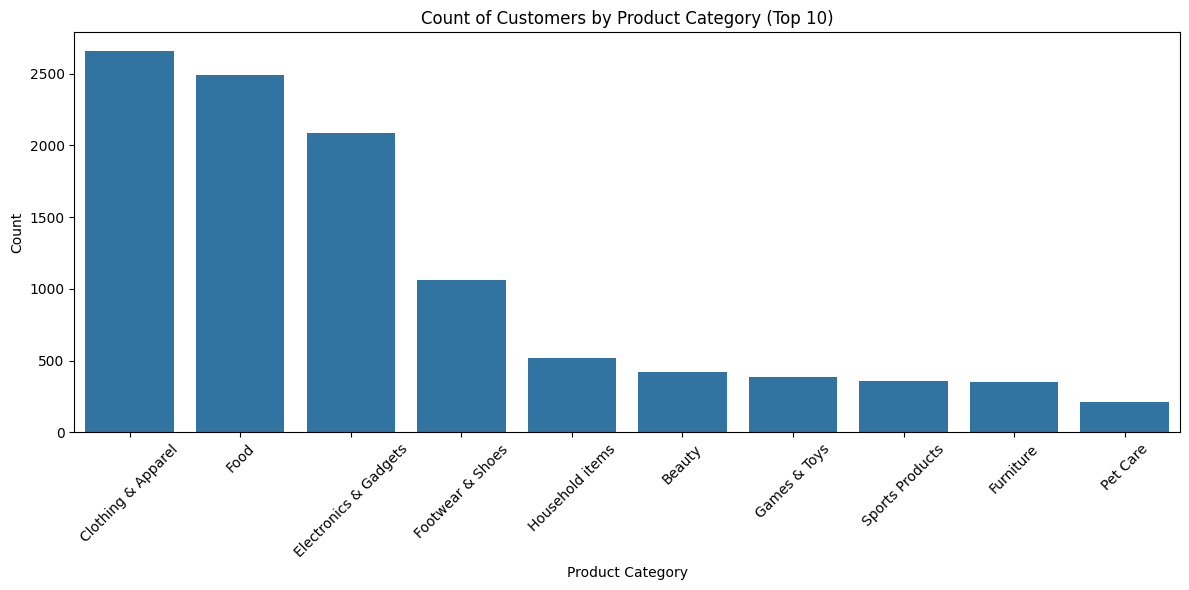

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().iloc[:10].index)
plt.title('Count of Customers by Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [67]:
top_products = df.groupby(['Product_ID'])['Orders'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Sold Product IDs:")
print(top_products.index.tolist())


Top 10 Most Sold Product IDs:
['P00265242', 'P00110942', 'P00237542', 'P00184942', 'P00114942', 'P00025442', 'P00117942', 'P00145042', 'P00044442', 'P00110842']
